In [1]:
import pandas as pd
import datasets
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\windown\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
pd.set_option('display.max_colwidth', None)

# Load bộ dữ liệu từ HuggingFace

In [3]:
ds = datasets.load_dataset('juliensimon/amazon-shoe-reviews')

In [4]:
df_train = pd.DataFrame(ds['train'])
df_test = pd.DataFrame(ds['test'])

# Ánh xạ các đánh giá trên thang đo về sao thành các nhãn cho Sentiment Analysis

In [5]:
sentiment_mapping = {
    0: 'Negative',
    1: 'Negative',
    2: 'Neutral',
    3: 'Positive',
    4: 'Positive'
}

In [6]:
df_train['labels'] = df_train['labels'].map(sentiment_mapping)
df_test['labels'] = df_test['labels'].map(sentiment_mapping)

In [7]:
df_train['labels'].value_counts()

labels
Negative    35984
Positive    35977
Neutral     18039
Name: count, dtype: int64

In [8]:
df_test['labels'].value_counts()

labels
Positive    4023
Negative    4016
Neutral     1961
Name: count, dtype: int64

# Lưu thành file CSV 

In [9]:
df_train.to_csv('amazon_shoe_train.csv', index=False)
df_test.to_csv('amazon_shoe_test.csv', index=False)

In [10]:
df_train

,labels,text
0,Positive,Good shoe for office work. They will scuff very easy so be aware.
1,Negative,"I have had the Patricia II wedge in black for about 1 year & wore them regularly in season. When I saw the Patricia at a good price in navy (from 6pm), I purchased them because I thought they would fit just like my Patricia IIs. I was wrong, and paid the price with return shipping that 6pm doesn't pay.<br /><br />The crocs website says that crocs aren't suppose to fit like other sandals - they are suppose to be looser & thus more comfortable - I normally wear an 8-1/2, so have now tried both an 8 & a 9 in the Patricia shoe (I have an 8 in the Patricia II). The Patricia 9 swims on my feet & they would be a hazard to walk around in. The size 8 fits my left foot (which is my wider foot) but is too narrow on my right foot. When I placed the shoes sole to sole, I did notice a slight difference in the width, which, apparently, my foot notices too. I can only conclude a manufacturing defect. But, it is this shoe specifically or the form for this shoe? (others have written the shoe is narrow).<br /><br />Consequently, if you have a wider foot, order the Patricia II instead of this one & if you are a 1/2 size, order down, not up."
2,Negative,Width not right and size too small if width had been just little wider and ordered size larger would have been good. Loved the shoe look
3,Negative,"I received these shoes and they weren't the same as the picture described them, they were a different color. When i tried to return them, the shipping wasn't paid for. So i had to pay $20 for shipping. A waste of time and money. I dont recommend anyone to buy from TheSmartBuy."
4,Neutral,They began to split alone the mesh material after a month but loved the shoe and the feel of it
...,...,...
89995,Neutral,I wear a size 7 in all my shoes but this one was too large. Hurt the back of my feet because they were too big.
89996,Positive,"Love the sunglasses. Love the look. Love the Polarized lenses. Love the price.<br />However, the lenses have popped out twice. Once from a 5 foot fall from my head on a carpeted floor. Another sitting in the case in my gym bag. I emailed customer support and never received a response. Would have been a 5 star but loses a star for poor customer service."
89997,Negative,"Were comfortable the 1st time, but seem to get tighter everytime I wore them 😣 recd many compliments on them but can no longer wear them"
89998,Negative,"Hurts my feet. Like wearing razor blades. The material is too scratchy and I can't even wear them. Even tried with hose on but they are aweful. I wore them to work one day, I stay at a desk mostly and couldn't even tolerate wearing them sitting down. They are attractive but OUCH!!"


# Thực hiện các thao tác thống kê ngữ liệu

In [11]:
def basic_preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]',  '', text)
    return word_tokenize(text)

In [12]:
result = {
    'Nội dung': ['Số lượng câu', 'Số từ trung bình mỗi câu', 'Số từ vựng duy nhất'],
    'Positive': [],
    'Negative': [],
    'Neutral': []
}

In [ ]:
for sentiment in ['Positive', 'Negative', 'Neutral']:
    subset = df_train[df_train['labels'] == sentiment]

    # 1. Số lượng câu
    count = len(subset)

    # 2. Số từ trung bình mỗi câu
    avg_words = subset['text'].apply(lambda x: len(x.split())).mean()

    # 3. Số từ vựng duy nhất
    vocab = set()
    for review in subset['text']:
        vocab.update(basic_preprocessing(review))
    vocab_size = len(vocab)

    result['Positive' if sentiment == 'Positive' else 'Negative' if sentiment == 'Negative' else 'Neutral'].extend([
        count, avg_words, vocab_size
    ])

summary_df_train = pd.DataFrame(result)

In [14]:
summary_df_train

,Nội dung,Positive,Negative,Neutral
0,Số lượng câu,35977.000000,35984.000000,18039.000000
1,Số từ trung bình mỗi câu,28.218056,37.086789,36.068463
2,Số từ vựng duy nhất,22068.000000,26560.000000,16608.000000


In [15]:
df_train['word_count'] =  df_train['text'].apply(lambda x: len(x.split()))
avg_words_count_total = df_train['word_count'].mean()
avg_words_count_total

33.33745555555556

In [16]:
vocab_all = set()
for review in df_train['text']:
    tokens = basic_preprocessing(review)
    vocab_all.update(tokens)

vocab_size_total = len(vocab_all)

In [17]:
vocab_size_total

41982

# Vẽ sơ đồ về phân bố số lượng nhãn 

C:\Users\windown\AppData\Local\Temp\ipykernel_12540\1578930425.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x='labels', palette='pastel')


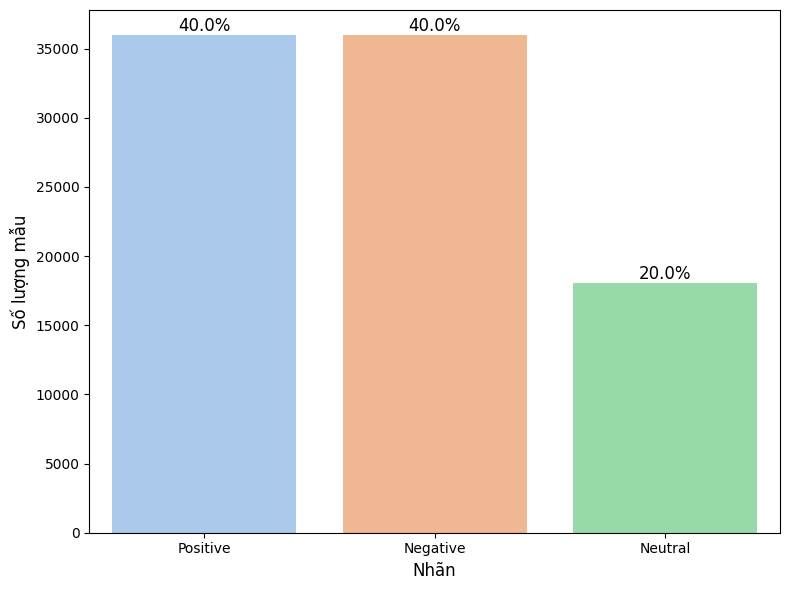

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='labels', palette='pastel')

# Hiển thị phần trăm trên đầu mỗi cột
label_counts = df_train['labels'].value_counts()
total = len(df_train)
for i, count in enumerate(label_counts):
    percent = count / total * 100
    plt.text(i, count + 300 , f'{percent:.1f}%', ha='center', fontsize=12)

# Thiết lập nhãn và tiêu đề
plt.xlabel('Nhãn', fontsize=12)
plt.ylabel('Số lượng mẫu', fontsize=12)
plt.tight_layout()
plt.show()

# Vẽ biểu đồ về những từ xuất hiện nhiều

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
top_words_by_label = {}

# Duyệt qua từng nhãn
for label in df_train['labels'].unique():
    subset = df_train[df_train['labels'] == label]  # lọc theo nhãn
    texts = subset['text'].astype(str).tolist()

    # Dùng CountVectorizer để đếm từ
    vectorizer = CountVectorizer(stop_words='english')  # có thể thêm stopwords tiếng Việt nếu cần
    X = vectorizer.fit_transform(texts)
    
    # Tính tổng số lần xuất hiện của mỗi từ
    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    
    word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})
    word_freq = word_freq.sort_values(by='count', ascending=False).head(20)
    
    top_words_by_label[label] = word_freq

In [21]:
def plot_top_words(word_freq_df, title):
    plt.figure(figsize=(10,6))
    sns.barplot(x='count', y='word', data=word_freq_df, palette='Blues_r')
    plt.title(title)
    plt.xlabel("Số lần xuất hiện")
    plt.ylabel("Từ")
    plt.tight_layout()
    plt.show()

C:\Users\windown\AppData\Local\Temp\ipykernel_12540\3730682289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=word_freq_df, palette='Blues_r')


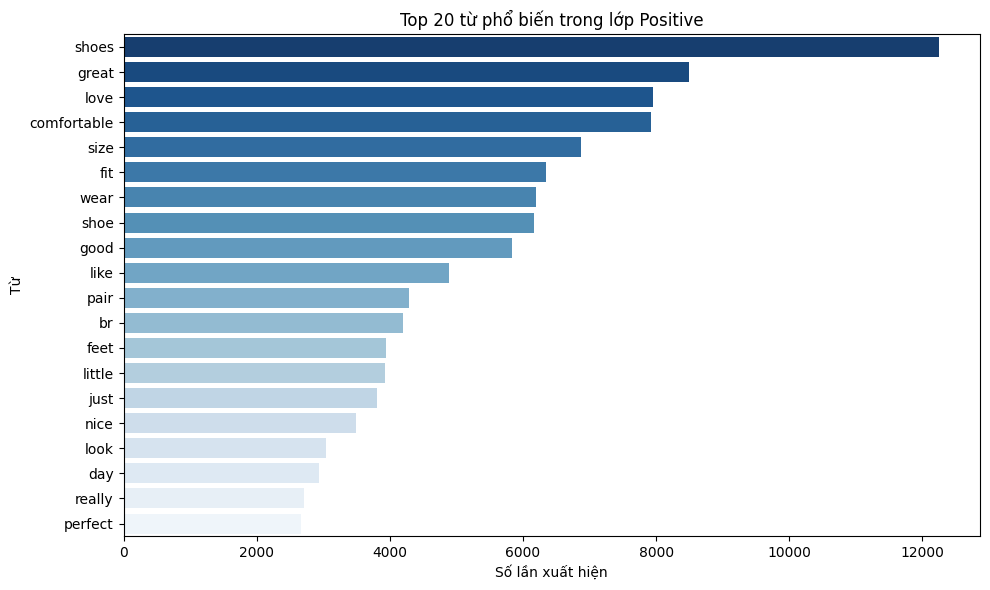

In [22]:
plot_top_words(top_words_by_label['Positive'], "Top 20 từ phổ biến trong lớp Positive")

C:\Users\windown\AppData\Local\Temp\ipykernel_12540\3730682289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=word_freq_df, palette='Blues_r')


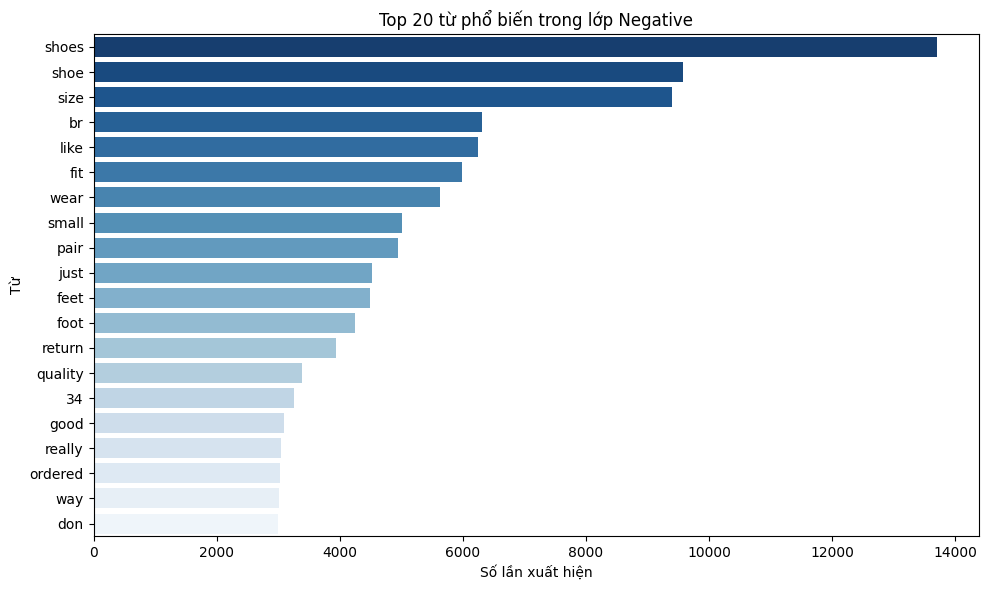

In [23]:
plot_top_words(top_words_by_label['Negative'], "Top 20 từ phổ biến trong lớp Negative")

C:\Users\windown\AppData\Local\Temp\ipykernel_12540\3730682289.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=word_freq_df, palette='Blues_r')


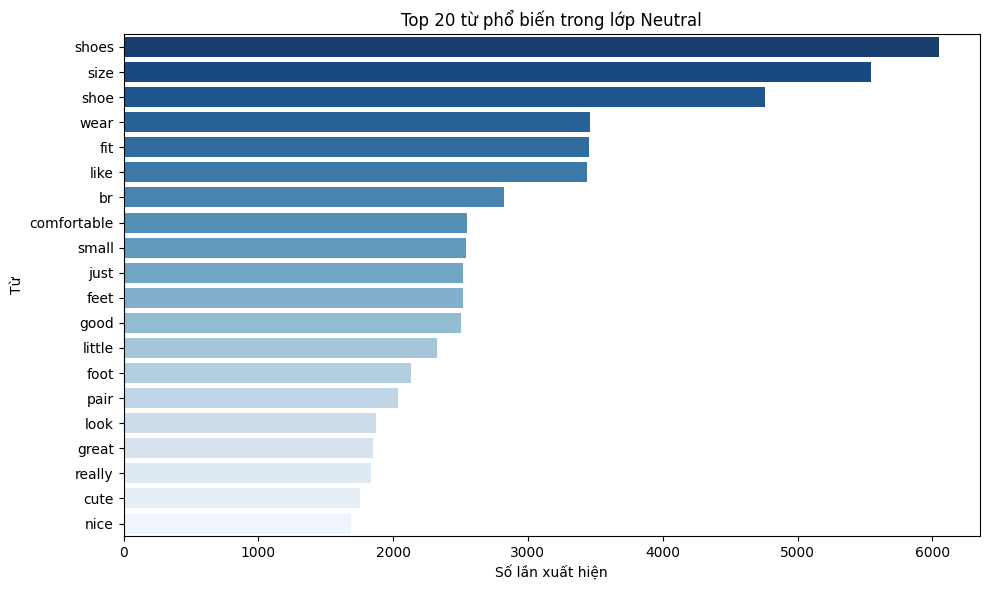

In [24]:
plot_top_words(top_words_by_label['Neutral'], "Top 20 từ phổ biến trong lớp Neutral")

In [25]:
texts = df_train['text'].astype(str).tolist()

# Khởi tạo CountVectorizer
vectorizer = CountVectorizer(stop_words='english')  # Nếu là tiếng Việt thì bạn có thể bỏ stop_words hoặc thay thế
X = vectorizer.fit_transform(texts)

# Tính tổng số lần xuất hiện của mỗi từ
word_counts = X.sum(axis=0).A1
vocab = vectorizer.get_feature_names_out()

# Tạo DataFrame chứa từ và số lần xuất hiện
word_freq = pd.DataFrame({'word': vocab, 'count': word_counts})
word_freq = word_freq.sort_values(by='count', ascending=False).head(20)

C:\Users\windown\AppData\Local\Temp\ipykernel_12540\2048293989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=word_freq, palette='crest')


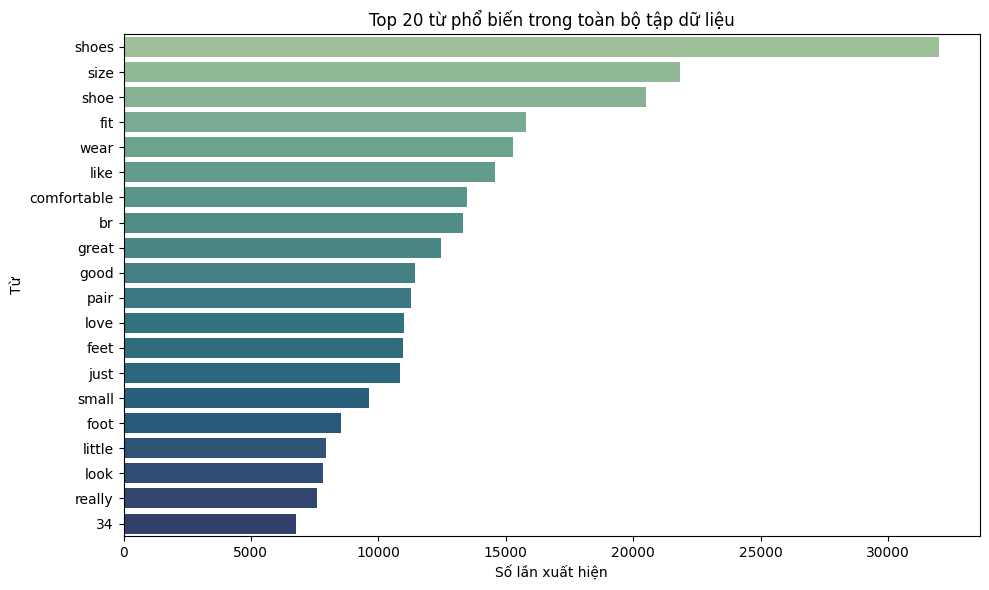

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=word_freq, palette='crest')
plt.title("Top 20 từ phổ biến trong toàn bộ tập dữ liệu")
plt.xlabel("Số lần xuất hiện")
plt.ylabel("Từ")
plt.tight_layout()
plt.show()

# Trích xuất ngữ liệu cho việc giải thích kết quả gán nhãn

In [32]:
df_train[df_train['labels'] == 'Positive'].head(12)

,labels,text,word_count
0,Positive,Good shoe for office work. They will scuff very easy so be aware.,13
5,Positive,"Excellent shoes , very confortable and litgthweight !",8
8,Positive,Everything about the boot is great.,6
12,Positive,Slippers fit great. Nice and cozy.,6
18,Positive,Fits well.,2
20,Positive,"True size 9, very comfortable and pretty. These were purchase to wear on campus, during heavy course days, that requires plenty of walking.",23
22,Positive,I only have worn them once or rwice but very comfortable and supported my feet for good length of time. I wish you had WIDE shoes thank you,28
23,Positive,Good sunglass,2
26,Positive,"Comfortable. I wear slippers all the time at home. These are a bit warm for the summer, but very good overall.",21
34,Positive,"I have converted my whole family to Tubes and a handful of friends. I love these shoes. The leather ones like these are a little warm but just as comfy as the rest of my tubes. I'm on my 3rd pair in 4 years and where them just about every day. The only downside to these shoes is they can be slippery on some surfaces, especially when wet. Be careful!",70


In [33]:
df_train[df_train['labels'] == 'Positive'].tail(12)

,labels,text,word_count
89960,Positive,"I bought these for my husband for his birthday. He had been eyeballing them. Yes they are on the more expensive side for being sandals, but they have been well worth the money. He has worn them all spring and summer long in all kinds of weather and conditions. They are really holding up their shape and quality. He pretty much wears them everyday after coming home from work. Wears them all weekend long. He loves them and they are well worth the price.",84
89963,Positive,"I just bought them, at first feels like kind of stretch on the sides, but will see how feels with some use...",22
89964,Positive,Wore for my wedding. Loved them!,6
89967,Positive,It's very nice shoes! It's comfortable.,6
89975,Positive,"Love this bag! Perfect size for my wallet, cellphone, keys and sunglasses. The lining is striped so I can find things easier than a solid dark color.",27
89979,Positive,Nice looking shoe. Comfortable,4
89981,Positive,The hard case is large enough to protect the glasses and provides adequate outside carry potential. The only negative comment I have is the zipper does not open or close easily because the zipper material is to flexible to allow closure until both zipper sides are manually (by hand) melded together to allow the zipper to begin to open or close.,61
89985,Positive,Perfect carry on or weekend bag.,6
89988,Positive,Excellent boot! Hardly no break in period (would definitely recommend and would buy again).,14
89992,Positive,"I can run in these if I wanted to,and keep my feet warm during winter.",15


In [34]:
df_train[df_train['labels'] == 'Negative'].head(12)

,labels,text,word_count
1,Negative,"I have had the Patricia II wedge in black for about 1 year & wore them regularly in season. When I saw the Patricia at a good price in navy (from 6pm), I purchased them because I thought they would fit just like my Patricia IIs. I was wrong, and paid the price with return shipping that 6pm doesn't pay.<br /><br />The crocs website says that crocs aren't suppose to fit like other sandals - they are suppose to be looser & thus more comfortable - I normally wear an 8-1/2, so have now tried both an 8 & a 9 in the Patricia shoe (I have an 8 in the Patricia II). The Patricia 9 swims on my feet & they would be a hazard to walk around in. The size 8 fits my left foot (which is my wider foot) but is too narrow on my right foot. When I placed the shoes sole to sole, I did notice a slight difference in the width, which, apparently, my foot notices too. I can only conclude a manufacturing defect. But, it is this shoe specifically or the form for this shoe? (others have written the shoe is narrow).<br /><br />Consequently, if you have a wider foot, order the Patricia II instead of this one & if you are a 1/2 size, order down, not up.",226
2,Negative,Width not right and size too small if width had been just little wider and ordered size larger would have been good. Loved the shoe look,26
3,Negative,"I received these shoes and they weren't the same as the picture described them, they were a different color. When i tried to return them, the shipping wasn't paid for. So i had to pay $20 for shipping. A waste of time and money. I dont recommend anyone to buy from TheSmartBuy.",52
6,Negative,"Usually love Ethnies product. In this case the raised arch area of one shoe is too far back and raised to the point of discomfort.<br />The other shoe fits fine.?? Had to wear em before I figured it out so im stuck with em.<br />Also, they do run a bit narrow(or at least one shoe did) ;)",57
7,Negative,Could not get my foot into the shoe. Was disappointed and returned them.,13
14,Negative,"Pros: They are very comfortable. I wear them all day long, every day with no complaints. They are also well ventilated to keep your feet cool. This makes them a little more prone to your socks getting wet from a puddle but not a big deal.<br />Cons: They aren't built to last. 4 months after I bought them they are junk. The rubber bottoms on both heels fell off. The side stripes are falling off, and the toe soles are coming off now too.<br />I've been wearing Asics for the last 10 years and this is the worst quality pair I've ever owned.",103
15,Negative,"These look great, the lenses are nice color and mirrored, and the matte finish is really nice. The good stops there.<br /><br />As soon as I put these on in my car I immediately notice big reflections that were very bright and hard to ignore. I thought that maybe I had left a sticker or some kind of plastic cover on the inside because it was crazy.<br /><br />The INSIDE of these are so reflective that it takes the light from the SIDE and BEHIND you and point it right back at your eyes.<br /><br />I seriously couldn't believe that these glassed meant to block out sunlight were actually reflecting it back into my eyes. I've bought a ton of stuff on Amazon and these might be the first I return.<br /><br />Truly truly useless.. DON'T BUY.",137
16,Negative,"I was expecting it to be great, but they do run small. It cuts into my ankle and i can't wear them to work as it was its purpose.... Highly suggest buying a size up.",35
19,Negative,"The quality is awful, shoes started falling apart the first week I had them. Not the first fakes ( or at least very poor quality items) that I have received from Amazon",32
24,Negative,"Not very flexible. Top strap is stiff, not pliable at all. After a week of use, there was little sign that it will relax any. Plastic from strap has sharp edge that irritated my foot top.",36


In [35]:
df_train[df_train['labels'] == 'Negative'].tail(12)

,labels,text,word_count
89972,Negative,"I just got the shoe's and wore them around the house for over an hour. I will use them as junker shoe's because that's really all they are good for. I have had several pairs of New Balance running shoes (Other pair is 750V1 - I really like those), these are garbage. They fit is tight and small, and they are narrow. No real arch support. It is almost like they took a tennis shoe and covered it with a running show shell? The quality and construction is pretty poor and doubt they will last very long. Basically the shoes are uncomfortable, don't waste your money. I don't want to go through the hassle of returning them and I will wear them (but working around the house outside). The one saving grace is aesthetically they look good.",137
89973,Negative,"These shoes have a good look but don't last long. I got mine Mar 11, so I'm at about month five with these and casual wear. Both shoes are coming apart along the outer edge where the canvas meets the rubber. I was a disappointed but now the left one started to make noise when I walk, hence the one star. My right shoe also got a puncture hole in it from something, and I have no idea how just glad it didn't get through to my foot. I have multiple other pairs of Merrells that have been durable but these seem to not be made as well.",108
89974,Negative,Bad lens,2
89976,Negative,bad quality the color went off after 2 weeks,9
89977,Negative,Bought two pairs of these shoes for my twins. They were trashed in a day. Fit was stiff & small. Don't waste your time or money.,26
89983,Negative,These were huge! I have other nw shoes and these were so much bigger. Have to return.,17
89984,Negative,These are SO cute but they did not fit my daughter the way I had hoped. The strap does not come off so they are a little difficult to get on. My daughter has wide feet and so they did not fit very well. Maybe would have fit better if I got one size bigger than she wears. She got blisters the first day she wore them. :(,68
89987,Negative,It's very cute but there was a seam sewn right on the front and the block spots began to rub white. I returned the item.,25
89990,Negative,"These shoes are great except for the soles - they're made up of several small patches of rubber glued to a soft foam sole. On each shoe, two of the rubber patches are peeling off, I've had to re-glue them a handful of times. Also, the foam part gets pretty torn up on rough terrain. After a couple of hikes in these I've decided to use them just as regular sneakers for every day, casual use. I love them for casual use, they're comfortable and the uppers seem pretty durable. I've worn them pretty much every day for the past 2.5 months and they've held up fine.<br /><br />6 Month update - Patches of rubber have torn off, others refuse to stay glued, and there is a hole in the upper portion on each shoe. Additionally, there's a hole through the sole at the heel of my left shoe, AFTER 6 MONTHS! Soles should not wear out in six months! They're still comfortable but they've worn out way too fast. I'm decreasing my rating from 3 stars to 1 star. I'm thankful I didn't pay very much for these",189
89994,Negative,"Received these shoes and had to turn around and send them right back. The footbed liner was coming up on both shoes before I even wore them; not a good sign of quality, or craftmanship[.",35


In [36]:
df_train[df_train['labels'] == 'Neutral'].head(12)

,labels,text,word_count
4,Neutral,They began to split alone the mesh material after a month but loved the shoe and the feel of it,20
9,Neutral,"Nice looking shoe, okay for short-term wear. Much narrower than other size 11's that I have - tight fit!",19
10,Neutral,"The shoe was the EXACT color I was looking for but... You get exactly what you pay for. Poorly made shoe. Fit comfy but the heel feels like it wobbles a little when I walk. Was going to wear them to an outside wedding, decided againt it. This shoe is probably more for a day at work.. or church. No where there would be a lots of walking around.",69
11,Neutral,"I loved how comfortable these shoes felt when I put them on. However, after a while, my big toe rubs against the toe cutout. To prevent the rubbing, I wear the shoe with a Band Aid across my toe and it helps. Donald Pliner is my go to brand for shoes. I am a little disappointed with this pair.",59
13,Neutral,"These shoes are cute as several people have said, however, they are cut low and do not lace all the way up to your ankle. I was concerned that they would slip when walking the golf course, so I returned them. Too bad.",43
17,Neutral,Fitted smaller than expected,4
21,Neutral,The shoe looks amazing but the width is too small .i really like the look,15
25,Neutral,"for the price, I am disappointed that the paint or whatever the outside layer is, is peeling. They also scratched SO easily. But the pink lenses have been awesome.",29
28,Neutral,Not quite what I expected. Sized small. Still like them though.,11
31,Neutral,nice looking...hopefully will wear well,5


In [37]:
df_train[df_train['labels'] == 'Neutral'].tail(12)

,labels,text,word_count
89951,Neutral,"A bit uncomfortable, whether due to my ankle bones or the moccasin style, or just needing to be broken in more; these develop pressure points on the side of my ankles where the throat of the shoe rubs against them. The footbed is great.",44
89955,Neutral,These are very attractive shoes. I wear an 8 or 8.5 normally. The 8 was too small. I returned them due the fit and the thin soles. However they are so cute I'm thinking about trying the 8.5. Not much to lose at this price point...,46
89965,Neutral,coming apart where the toe meets the body (by the ball of the foot). I expected them to hold up better than they have. Other than that no complaints. They are comfortable for a hiking shoe.,36
89966,Neutral,Cute but smaller than expected for the $$,8
89978,Neutral,A little smaller than my other sandals,7
89980,Neutral,This shoe is not as comfortable as I expected it to be.,12
89982,Neutral,Two left found in the box ..,7
89986,Neutral,needs half sizes I usually wear an 8 the 8 was way to small as in my toes were hanging over the edge. the 9 is way too big.,29
89989,Neutral,"I used to really love these. They're still comfy and great, I could hike 3-5 miles in these. However I went on my longest hike of 10 miles and my toes were ACHING. I ordered half a size bigger and Never had a problem with them until my longest hike. Really wish I could've worn these forever but for long hikes, not for me!",64
89991,Neutral,"good looking shoe, No support",5
